In [24]:
import numpy as np
import pandas as pd
from timeit import timeit
import matplotlib.pyplot as plt

In [2]:
# generate a numpy array of size 5000 with integers between 1 and 5000
numbers = np.random.randint(1, 5001, 5000)

In [3]:
# define the non vectorized-fizzbuzz
def fizzbuzz(i):
    
    """
    Takes an interger,
    returns "fizzbuzz" if it is divisible by 3 and 5,
    returns "fizz" if it is divisible by 3 and not 5,
    returns "buzz" if it is divisible by 5 and not 3,
    otherwise returns the integer convert to a string.
    """
    
    if i % (3 * 5) == 0:
        return "fizzbuzz"
    elif i % 3 == 0:
        return "fizz"
    elif i % 5 == 0:
        return "buzz"
    else:
        return str(i)

In [4]:
# make the python list comprehension version of the function
def fizzbuzz_loop(numbers):
    
    """
    Takes numbers, an array-like of integers.
    Uses a loop to apply fizzbuzz and returns the result as a list.
    """
    
    fizzbuzzes = []
    
    for e in numbers:
        fizzbuzzes.append(fizzbuzz(e))
        
    return fizzbuzzes

In [5]:
# make the python list comprehension version of the function
def fizzbuzz_lc(numbers):
    
    """
    Takes numbers, an array-like of integers.
    Uses list comprehension to apply fizzbuzz and returns the result as a list.
    """
    
    return [fizzbuzz(e) for e in numbers]

In [6]:
# make the python map version of the function
def fizzbuzz_map(numbers):
    
    """
    Takes numbers, an array-like of integers.
    Uses map to apply fizzbuzz and returns the result as a list.
    """
    
    return list(map(fizzbuzz, numbers))

In [7]:
# make the pandas version of the function
def fizzbuzz_pandas(numbers):
    
    """
    Takes numbers, an array-like of integers, converts to a pd.Series.
    Uses Series.apply() to apply fizzbuzz() and returns the result as a list.
    """
    
    return list(pd.Series(numbers).apply(fizzbuzz))
    

In [8]:
# make the numpy version of the function
fizzbuzz_vectorized = np.vectorize(fizzbuzz)

# modify the docstring for fun
fizzbuzz_vectorized.__doc__ = """
    IS a vectorized version of fizzbuzz().
    Takes numbers, an array-like of integers.
    Returns the corresponding fizzbuzzed array as an np.array.
    """

In [9]:
# verify that all of the results are the same
results = [
            fizzbuzz_loop(numbers),
            fizzbuzz_lc(numbers),
            fizzbuzz_map(numbers),
            list(fizzbuzz_pandas(numbers)),
            list(fizzbuzz_vectorized(numbers))
        ]

all([a == results[0] for a in  results])

True

In [10]:
def time_function(reps, func, *args):
    
    """
    passes *args into a func and times func(*args)
    repeats reps times
    returns average time in milliseconds(ms)
    """

    def no_args():
        return func(*args)
    
    avg_time = timeit(no_args, number=reps) / reps
    
    return avg_time * 1000

In [11]:
time_function(10, fizzbuzz_loop, numbers)

8.070377400144935

In [12]:
def time_fizzbuzz(func, vector_length, data_reps = 10, reps = 10):
    
    """
    Time the execution of a fizzbuzz implementation
    on a vector of length vector_length
    over data_reps different vectors, reps times,
    returns the average time.
    
    Arguments
    -------------------------------------------
    func (function) : the fizzbuzz implementation
    vector_length (int) : the length of the vector to put into fizzbuzz
    data_reps (int) : the numer of different vectors to test on
    reps (int) : the number of reps to use to test each vector
    """
    
    total_time = 0
    
    for i in range(0, data_reps):
        
        numbers = np.random.randint(1, 5001, vector_length)
        inst_time = time_function(reps, func, numbers)
        total_time += inst_time

    avg_time = total_time / data_reps
    
    return avg_time

In [13]:
ord_mag = 5
lengths = [10 ** n for n in range(0, ord_mag + 1)]

In [14]:
time_object = [
    {
        "length":length,
        "loop_time": time_fizzbuzz(fizzbuzz_loop, length),
        "lc_time": time_fizzbuzz(fizzbuzz_lc, length),
        "map_time": time_fizzbuzz(fizzbuzz_map, length),
        "pandas_time": time_fizzbuzz(fizzbuzz_pandas, length),
        "vectorized_time": time_fizzbuzz(fizzbuzz_vectorized, length)
    } 
    
    for length in lengths
]

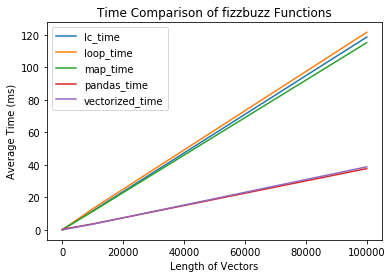

In [28]:
pd.DataFrame(time_object).set_index("length").plot()
plt.title("Time Comparison of fizzbuzz Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.show()